In [2]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
# Use LaTeX font
plt.rcParams.update({'text.usetex': True})

# Figure font config
label_font = {'fontfamily': 'Arial Black', 'fontsize': 14}
title_font = {'fontfamily': 'Arial Black', 'fontsize': 16}
legend_font = {'family': 'Palatino Linotype', 'size': 10}
text_font = {'family': 'Palatino Linotype', 'fontsize': 12}

In [3]:
# Generate data
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

label_list = ['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5']
marker_list = ['o', '^', 'P', '*', 's']

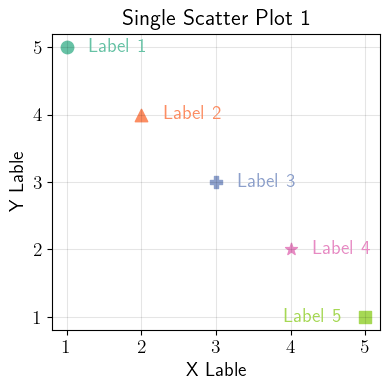

In [4]:
fig, ax = plt.subplots(1, figsize=(4, 4))

for i in range(len(x)):
    ax.scatter(
        x[i], y[i], 
        color=cm.Set2(i), 
        marker=marker_list[i], 
        s=80
    )
    if i < 4: 
        ax.text(
            x[i] + 0.3, y[i], 
            label_list[i], 
            fontdict=text_font, 
            color=cm.Set2(i), 
            verticalalignment='center', 
            horizontalalignment='left'
        )
    else:
        ax.text(
            x[i] - 0.3, y[i], 
            label_list[i], 
            fontdict=text_font, 
            color=cm.Set2(i), 
            verticalalignment='center', 
            horizontalalignment='right'
        )

# Label and title
ax.set_xlabel('X Lable', fontdict=label_font)
ax.set_ylabel('Y Lable', fontdict=label_font)
ax.set_title('Single Scatter Plot 1', fontdict=title_font)

# Ticks fontsize and font family
ax.tick_params(axis='both', which='major', labelsize=14)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('serif') for label in labels]

# Grid
ax.grid(axis='both', color='black', alpha=0.1)

plt.tight_layout()
plt.savefig('../fig/single-scatter-1.jpg', dpi=300)

In [5]:
# Generate data
depot = [0.5, 0.5]
nodes_x, nodes_y = np.meshgrid(
    np.linspace(0, 1, 4), 
    np.linspace(0, 1, 4)
)
node_prob = np.random.rand(4, 4)
routing_x = [
    [0.5, 0, 0, 0.33, 0.5],
    [0.5, 0.66, 1, 1, 0.5],
    [0.5, 1, 1, 0.66, 0.5],
    [0.5, 0.33, 0, 0, 0.5]
]
routing_y = [
    [0.5, 0.66, 1, 1, 0.5],
    [0.5, 1, 1, 0.66, 0.5],
    [0.5, 0.33, 0, 0, 0.5],
    [0.5, 0, 0, 0.33, 0.5]
]

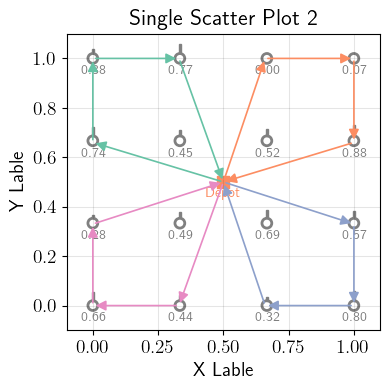

In [6]:
fig, ax = plt.subplots(1, figsize=(4, 4))

# Scatter node
ax.scatter(
    nodes_x, nodes_y,
    edgecolors='gray', 
    facecolors='none', 
    marker='o', 
    linewidths=2,
    s=50
)
ax.scatter(
    depot[0], depot[1],
    color=cm.Set2(1),
    marker='s',
    s=80
)

# Plot node probability bar & text
for idx, (x, y) in enumerate(zip(nodes_x.flatten(), nodes_y.flatten())):
    prob = node_prob[idx // 4][idx % 4]
    ax.add_patch(
        plt.Rectangle(
            (x - 0.005, y + 0.02),
            0.01,
            prob * 0.05,
            edgecolor='gray',
            facecolor='gray',
            fill=True,
        )
    )
    ax.text(
        x, y - 0.025,
        f"{prob:.2f}",
        horizontalalignment="center",
        verticalalignment="top",
        fontsize=10,
        color='gray',
    )

# Text depot
ax.text(
    depot[0], depot[1] - 0.025,
    f"Depot",
    horizontalalignment="center",
    verticalalignment="top",
    fontsize=10,
    color=cm.Set2(1),
)

# Plot routing
for routing_idx in range(4):
    for path_idx in range(4):
        src_x = routing_x[routing_idx][path_idx]
        src_y = routing_y[routing_idx][path_idx]
        dst_x = routing_x[routing_idx][path_idx + 1]
        dst_y = routing_y[routing_idx][path_idx + 1]
        ax.annotate(
            "",
            xy=(dst_x, dst_y),
            xytext=(src_x, src_y),
            arrowprops=dict(
                arrowstyle="-|>", 
                color=cm.Set2(routing_idx),
                lw=1.2,
            ),
            size=15,
            annotation_clip=False,
        )

# Axis range
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Label and title
ax.set_xlabel('X Lable', fontdict=label_font)
ax.set_ylabel('Y Lable', fontdict=label_font)
ax.set_title('Single Scatter Plot 2', fontdict=title_font)

# Ticks fontsize and font family
ax.tick_params(axis='both', which='major', labelsize=14)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('serif') for label in labels]

# Grid
ax.grid(axis='both', color='black', alpha=0.1)

plt.tight_layout()
plt.savefig('../fig/single-scatter-2.jpg', dpi=300)

In [23]:
# Generate data
x = np.linspace(0, 1, 10)
y1 = [0.55] * 6 + [0.65, 0.80, 0.95, 1.2]
y2 = [0.45] * 6 + [0.35, 0.20, 0.05, -0.2]

y1 = np.array(y1)
y2 = np.array(y2)

err1_x = np.random.rand(10) * 0.05 - 0.025 
err1_y = np.random.rand(10) * 0.05 - 0.025
err2_x = np.random.rand(10) * 0.05 - 0.025
err2_y = np.random.rand(10) * 0.05 - 0.025

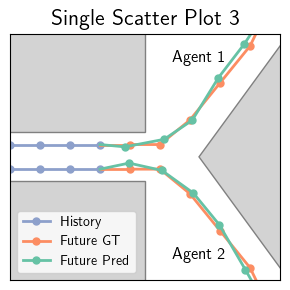

In [37]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(3, 3))

# Plot history
ax.plot( x[:4], y1[:4], label='History', color=cm.Set2(2), marker='o', lw=2, markersize=5)
ax.plot( x[:4], y2[:4], color=cm.Set2(2), marker='o', lw=2, markersize=5)

# Plot future ground truth
ax.plot( x[4:], y1[4:], label='Future GT', color=cm.Set2(1), marker='o', lw=2, markersize=5)
ax.plot( x[4:], y2[4:], color=cm.Set2(1), marker='o', lw=2, markersize=5)

# Connection
ax.plot( [x[3], x[4]], [y1[3], y1[4]], color=cm.Set2(1), lw=2, ls='-')
ax.plot( [x[3], x[4]], [y2[3], y2[4]], color=cm.Set2(1), lw=2, ls='-')

# Plot future prediction
ax.plot(x[4:]+err1_x[4:], y1[4:]+err1_y[4:], label='Future Pred', color=cm.Set2(0), marker='o', lw=2, markersize=5)
ax.plot(x[4:]+err2_x[4:], y2[4:]+err2_y[4:], color=cm.Set2(0), marker='o', lw=2, markersize=5)

# Connection
ax.plot([x[3], x[4]+err1_x[4]], [y1[3], y1[4]+err1_y[4]], color=cm.Set2(0), lw=2, ls='-')
ax.plot([x[3], x[4]+err2_x[4]], [y2[3], y2[4]+err2_y[4]], color=cm.Set2(0), lw=2, ls='-')

# Add map items
ax.add_patch(patches.Rectangle((-0.1, 0.6), 0.6, 0.6, edgecolor='grey', 
                               facecolor='lightgrey', lw=1, fill=True,))
ax.add_patch(patches.Rectangle((-0.1, -0.1), 0.6, 0.5, edgecolor='grey', 
                               facecolor='lightgrey', lw=1, fill=True,))
ax.add_patch(patches.Polygon([(0.7, 0.5), (1.1, 1.1), (1.1, -0.1)], 
                             edgecolor='grey', facecolor='lightgrey', lw=1, fill=True,))

# Text infomation
ax.text(
    0.7, 0.9,
    'Agent 1',
    fontdict=text_font,
    color='black',
    verticalalignment='center', 
    horizontalalignment='center'
)
ax.text(
    0.7, 0.1,
    'Agent 2',
    fontdict=text_font,
    color='black',
    verticalalignment='center', 
    horizontalalignment='center'
)

# Legend
ax.legend(loc='lower left', prop=legend_font)

# Axis range
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Label and title
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Single Scatter Plot 3', fontdict=title_font)

plt.tight_layout()
plt.savefig('../fig/single-scatter-3.jpg', dpi=300)

In [6]:
# Load data
value = np.load('../data/single-scatter-4-value.npy')
x = np.linspace(0, 256, 18, endpoint=True)
y = np.linspace(0, 256, 18, endpoint=True)

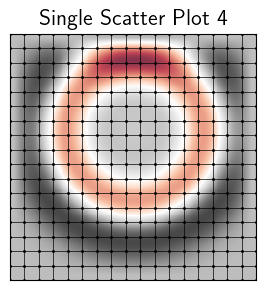

In [8]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(3, 3))

# Plot background value
ax.matshow(value, cmap=cm.RdGy, alpha=0.8)

# Collocation Point
for i in x:
    for j in y:
        ax.scatter(i, j, color='black', marker='.', s=5)

# Mesh
for i in range(17):
    for j in range(17):
        ax.plot([x[i], x[i+1]], [y[j], y[j]], color='black', linewidth=0.5)
        ax.plot([x[i], x[i]], [x[j], y[j+1]], color='black', linewidth=0.5)

# Axis range
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.invert_yaxis()

# Label and title
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Single Scatter Plot 4', fontdict=title_font)

plt.tight_layout()
plt.savefig('../fig/single-scatter-4.jpg', dpi=300)

In [9]:
# Load data
# Note: shape = [num_step, num_agent, position]
# last agent is the basketball
hist = np.load('../data/single-scatter-5-hist.npy')
pred = np.load('../data/single-scatter-5-pred.npy')

# Scale the data
hist[..., 0] = hist[..., 0] * 15
hist[..., 1] = hist[..., 1] * 8
pred[..., 0] = pred[..., 0] * 15
pred[..., 1] = pred[..., 1] * 8

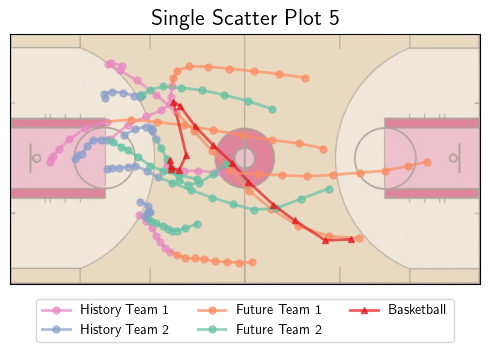

In [11]:
import cv2 as cv

fig, ax = plt.subplots(1, figsize=(5, 5))

# Plot the beckground court
img = cv.imread('../fig/utils/court.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax.imshow(img, extent=[0, 15, 0, 8], alpha=0.6)

# Scatter history trajectory
ax.plot(hist[:, :5, 0], hist[:, :5, 1], label='History Team 1', color=cm.Set2(3), 
        marker='o', lw=2, markersize=5, alpha=0.7)
ax.plot(hist[:, 5:-1, 0], hist[:, 5:-1, 1], label='History Team 2', color=cm.Set2(2), 
        marker='o', lw=2, markersize=5, alpha=0.7)

# Scatter future trajectory
ax.plot(pred[:, :5, 0], pred[:, :5, 1], label='Future Team 1', color=cm.Set2(1), 
        marker='o', lw=2, markersize=5, alpha=0.7)
ax.plot(pred[:, 5:-1, 0], pred[:, 5:-1, 1], label='Future Team 2', color=cm.Set2(0), 
        marker='o', lw=2, markersize=5, alpha=0.7)

# Scatter the basketball
ax.plot(hist[:, -1, 0], hist[:, -1, 1], label='Basketball', color=cm.Set1(0), 
        marker='^', lw=2, markersize=5, alpha=0.7)
ax.plot(pred[:, -1, 0], pred[:, -1, 1], color=cm.Set1(0), 
        marker='^', lw=2, markersize=5, alpha=0.7)

# Connect history and future
ax.plot([hist[0, :5, 0], pred[-1, :5, 0]], [hist[0, :5, 1], pred[-1, :5, 1]], 
        color=cm.Set2(1), lw=2, ls='-', alpha=0.7)
ax.plot([hist[0, 5:-1, 0], pred[-1, 5:-1, 0]], [hist[0, 5:-1, 1], pred[-1, 5:-1, 1]], 
        color=cm.Set2(0), lw=2, ls='-', alpha=0.7)
ax.plot([hist[0, -1, 0], pred[-1, -1, 0]], [hist[0, -1, 1], pred[-1, -1, 1]], 
        color=cm.Set1(0), lw=2, ls='-', alpha=0.7)

# Label and title
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_title('Single Scatter Plot 5', fontdict=title_font)

# Legend
handles, labels = ax.get_legend_handles_labels()
labels = dict(zip(labels, handles))
fig.legend(labels.values(), labels.keys(), loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0.12), prop=legend_font)

plt.tight_layout()
plt.savefig('../fig/single-scatter-5.jpg', dpi=300)